In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib in line
import warnings
warnings.filterwarnings('ignore')


UsageError: unrecognized arguments: line


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv',sep=",")
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
df.shape

(31647, 18)

In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# dimension of dataset and structure

In [5]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
 df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [7]:
df.duplicated().sum() # checking for duplicate items

0

 **Note :-** There are no any rows in the dataset that are exact duplicates of each other.

In [8]:
df.isnull().sum() # check for null values

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Statistical Summary and Correlation Matrix Graph

In [9]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### **Note :-**

- The **pdays column** contains values of **-1**, which indicate that certain customers were not contacted previously as part of the bank's marketing campaign.

- The dataset includes a **large number of new customers**, as evidenced by the prevalence of 0 values in column previous, which suggest that many customers have not previously been contacted before this campaign.

- The balance column contains some negative values, which could indicate that certain customers have overdrawn on their accounts or have outstanding debts. These **negative balances** suggest that some customers may be experiencing financial difficulties or challenges.

- it appears that there are a small number of outliers in the **balance** and **duration** columns, as indicated by the notable gap between the values of the 75th percentile and the maximum values in these columns. This suggests that there may be a few extreme values that are skewing the distribution of the data in these columns. 

In [10]:
#check target value count
df['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

**Note :-**
- The target column is highly imbalanced, with a **low ratio of positive responses (yes) to negative responses (no).** This is expected in a marketing campaign, as only a **small percentage of the target audience may be interested in the product being offered**, such as a term deposit in this case. However, the significant overrepresentation of "no" responses compared to "yes" responses suggests a class imbalance, which should be accounted for when building predictive models to ensure accurate results.

In [11]:
# Lets check how many customers balance is 0 or negative

df[(df['balance']<=0)].value_counts().sum()

5135

In [12]:
# Let's check how many customers subscribed to term deposit despite having a balance of 0 or negative

df[(df['balance']<=0) & (df['subscribed']=='yes')].value_counts().sum()

341

**Note :-**
- It seems strange that there are **5135 customers with a zero or negative bank balance** who also have housing loans or personal loans or credit in default. Out of these 5135 customers, 341 customers would subscribe to a term deposit.

-  there is a very low percentage(6.8%) of customers with a negative or zero bank balance who subscribed to a term deposit. This could indicate that there is some error in the data or that these customers are not a good target for marketing campaigns.

- We need to further investigate the data to determine if there are any discernible patterns.

In [13]:
# find out the percentage of customers with a primary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='primary')].value_counts().sum() / 
          df[(df['balance']<=0) & (df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'5.16%'

In [14]:
# find out the percentage of customers with a secondary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='secondary')].value_counts().sum() / 
          df[(df['balance']<=0) & (df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'22.52%'

In [15]:
# find out the percentage of customers with a tertiary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['education']=='tertiary')].value_counts().sum() / 
          df[(df['balance']<=0) & (df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'14.47%'

In [16]:
# find out the percentage of customers who is student who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['job']=='student')].value_counts().sum() / 
          df[(df['balance']<=0) & (df['job']=='student')].value_counts().sum()*100,2)) + '%'

'15.79%'

In [17]:
# find out the percentage of customers who is retired who have subscribed to term deposit and have a non-positive bank balance.

str(round(df[(df['balance']<=0) & (df['subscribed']=='yes') & (df['job']=='retired')].value_counts().sum() / 
          df[(df['balance']<=0) & (df['job']=='retired')].value_counts().sum()*100,2)) + '%'

'14.36%'

**Observations:-**
- Among customers with a non-positive bank balance, those with a secondary education have the highest percentage of subscribing to a term deposit (22.52%), followed by tertiary education (14.47%) and primary education (5.16%).

- Students with a non-positive bank balance have the highest percentage of subscribing to a term deposit (15.79%), followed by retired customers (14.36%).

- Out of the total 5135 customers with a non-positive bank balance, only 341 subscribed to a term deposit, indicating that the majority of customers with a non-positive bank balance did not subscribe to a term deposit.

- It may be useful to gather additional information on these customers, such as their financial history and reasons for having a non-positive bank balance, to gain a better understanding of their behavior and improve targeting of future marketing campaigns.

- but there is no any clear relationship between any of the columns. The data is imbalanced and does not make sense. Negative or zero bank balance and outstanding loans make it unlikely for customers to subscribe to term deposits. Therefore, we consider this a type of outlier.

- We decided to drop the 341 values of customers with a non-positive bank balance who subscribed to term deposits to eliminate outliers. This action is taken based on real time scinario because this is not make sense right ? which will save man-hours and resources while yielding more accurate predictions.

In [18]:
# Dropping unnecessary rows

df = df.drop(df[(df['balance']<=0) & (df['subscribed']=='yes')].index)

In [19]:
df.shape

(31306, 18)

# EDA

In [20]:
#find categorical datatypes
cat=[columns for columns in df.columns if (df[columns].dtypes=='object')]
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [21]:
#find numerical datatypes
num=[columns for columns in df.columns if (df[columns].dtypes!='object')]
num

['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# **`Univariate and Bivariate Analysis of catagorical variables`**

AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

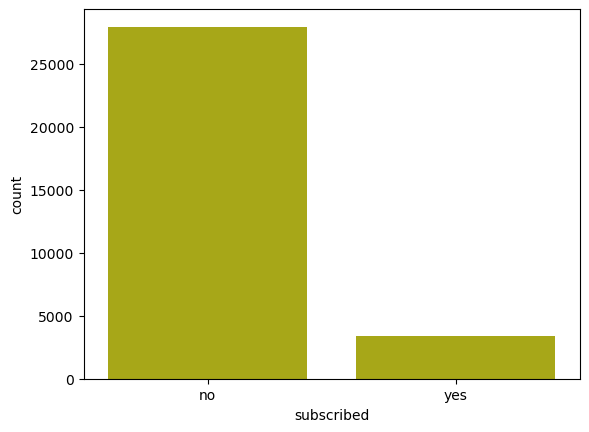

In [22]:


sns.countplot(data=df, x='subscribed', color='y')
plt.xaxis('Term deposit subscription',fontsize=15)
plt.yaxis('Total Count of customers',fontsize=16)
fig.show()

**observations :-**
- Based on the analysis of the target column  (term deposit subscription), we found a significant gap in the ratio of customers who subscribed to the term deposit and those who did not. The ratio of non-subscribed to subscribed customers is 88:12, indicating that the bank invested a considerable amount of time, resources, and manpower without generating the desired outcome. To overcome this issue, we build a predictive model that can efficiently identify potential customers likely to subscribe to the term deposit, saving time and resources.

- However, the data is also imbalanced, which can impact the accuracy of the predictive model. we implementing various techniques in feature engineering to balance the dataset and improve model performance.

In [ ]:
# check the job categories wise bank customers total count using univariate
sns.countplot(data=df, x='job', color='b')
plt.xlabel('Job Categories of Bank Customers',fontsize=16)
plt.ylabel('Total Count of customers',fontsize=16)
fig.show()

In [ ]:
cat[0:10]


In [ ]:
fig = plt.figure(figsize=(25,46))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[cat[r]].value_counts().plot(kind = 'bar', rot=35, fontsize = 13)
    ax.set_xlabel(cat[r],fontsize = 20)
    ax.xaxis.set_label_coords(1.05, -0.025)
    ax.set_ylabel('counts')


# Histogram of Numerical Variables

In [ ]:
num

In [ ]:
fig = plt.figure(figsize=(18,18))
for r in range(0,10):
    ax = fig.add_subplot(5,2,r+1)
    ax = df[num[r]].hist()
    ax.set_xlabel(num[r])


# Plot the Target Variable

In [ ]:
# Set figure size with matplotlib
fig, axs = plt.subplots(1,2,figsize=(14,7))
#create the frequency graph of Target variable deposit
sns.countplot(x='subscribed',data=df, ax=axs[0])
axs[0].set_title("Frequency of each Term Deposit Status")
#create the pie graph of Target variable deposit in term of percentage
df.subscribed.value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.3f%%')
axs[1].set_title("Percentage of each Term Deposit Status")


**Findings:**

    -Age is the only variable that might have a normal distribution.
    -It looks like the target variable is imbalanced. It might affect certain machine learning algorithmn. We will resample the data and make the target variable balance.


# Correlation

In [23]:
df.corr()

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.010313,0.070771,-0.063714,0.007003,-0.102491,0.435899,0.253027
age,0.010313,1.000000,0.104529,-0.011720,-0.003669,0.007399,-0.022451,0.005896
balance,0.070771,0.104529,1.000000,0.003261,0.033502,-0.012641,0.002840,0.014571
day,-0.063714,-0.011720,0.003261,1.000000,-0.032071,0.159276,-0.087285,-0.048569
duration,0.007003,-0.003669,0.033502,-0.032071,1.000000,-0.081643,0.000392,0.003218
campaign,-0.102491,0.007399,-0.012641,0.159276,-0.081643,1.000000,-0.086937,-0.032731
pdays,0.435899,-0.022451,0.002840,-0.087285,0.000392,-0.086937,1.000000,0.428969
previous,0.253027,0.005896,0.014571,-0.048569,0.003218,-0.032731,0.428969,1.000000


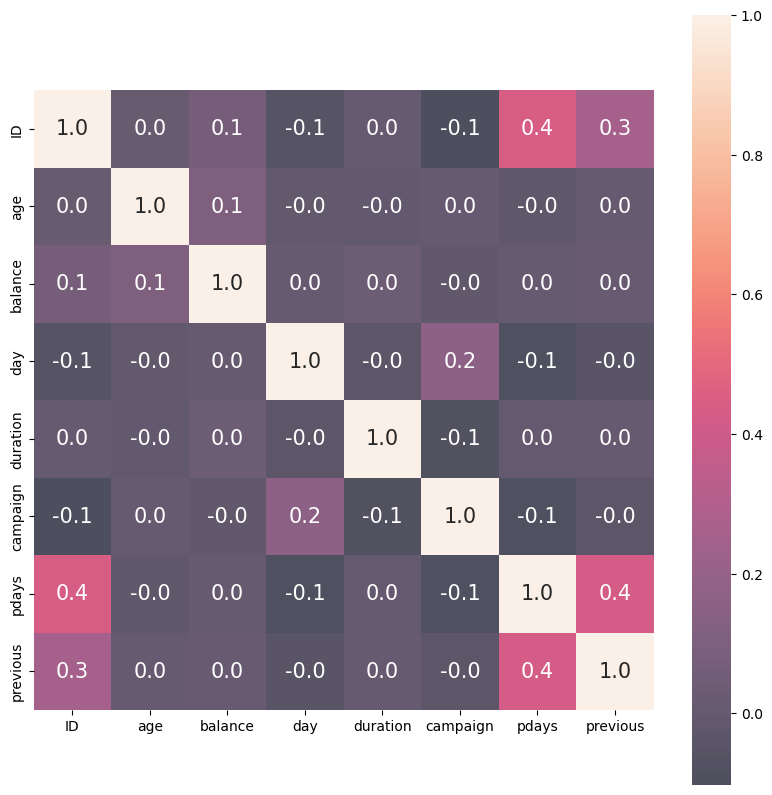

In [24]:
coreleation= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},alpha=0.7)
plt.show()

# Outlier Detection

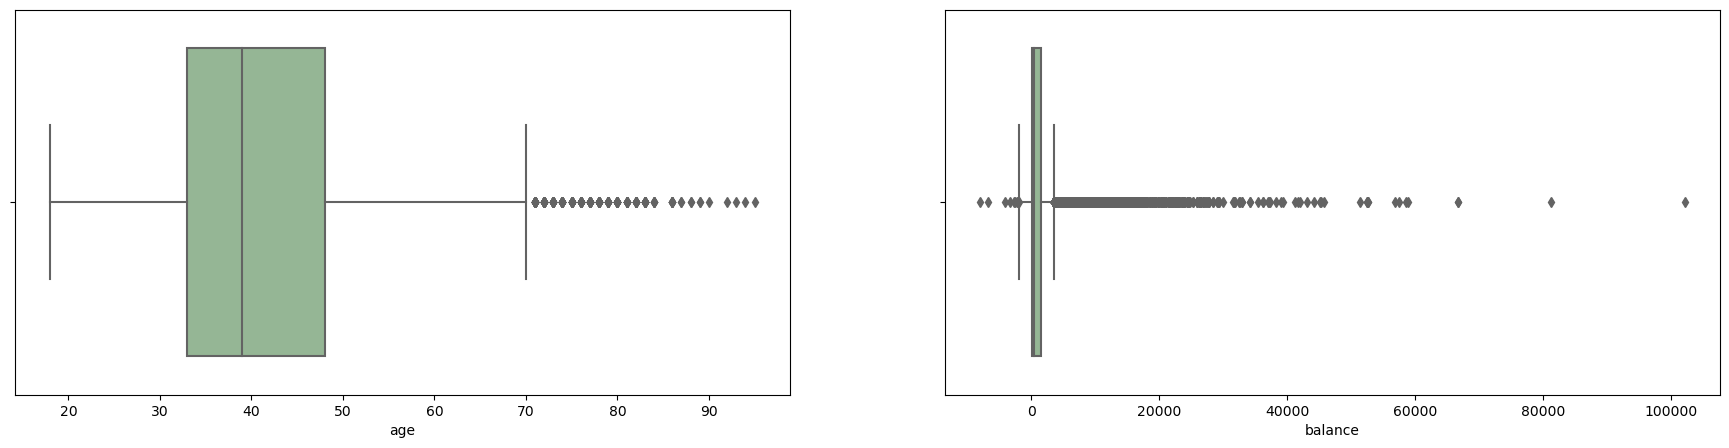

In [25]:
# ploting a boxplot for numerical features to check the outliers

columns = ['age','balance']

plt.figure(figsize=(22,5))

n = 1
for col in columns:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=df[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
plt.show()

- In these scenarios, it is not advisable to remove outliers from the dataset as they contain valuable information. For example, in the bank balance column, some customers have high balances while some have non-positive balances. If we remove these outliers, our model will not have sufficient information to make accurate predictions, and there is a risk of overfitting.

- Similarly, for the age column, there are outliers in the dataset, but we need to train our model to make predictions based on all available factors. If we remove the outliers, we may lose critical information that can affect the accuracy of our model. Therefore, it is important to keep the outliers in the dataset and use appropriate techniques to handle them during model training. here not any issue because we use robust algorithms.

# Feature transformation

In [26]:
# converting job column into new categorical column by assinging categories

def job_category(job):
  cat_1 = ['retired','student']
  cat_2 = ['blue-collar','management','technician','admin.','services']
  cat_3 = ['unemployed','housemaid','unknown']
  cat_4 = ['self-employed','entrepreneur']

  if job in cat_1 :
      return 'cat1'
  if job in cat_2 :
      return 'cat2'
  if job in cat_3 :
      return 'cat3'
  if job in cat_4 :
      return 'cat4'
  return job

In [27]:
# apply function job_category for add new column in dataset

df['job_categories']=df['job'].apply(job_category)

df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,job_categories
28155,30320,35,management,divorced,tertiary,no,457,yes,no,cellular,5,feb,114,3,-1,0,unknown,no,cat2


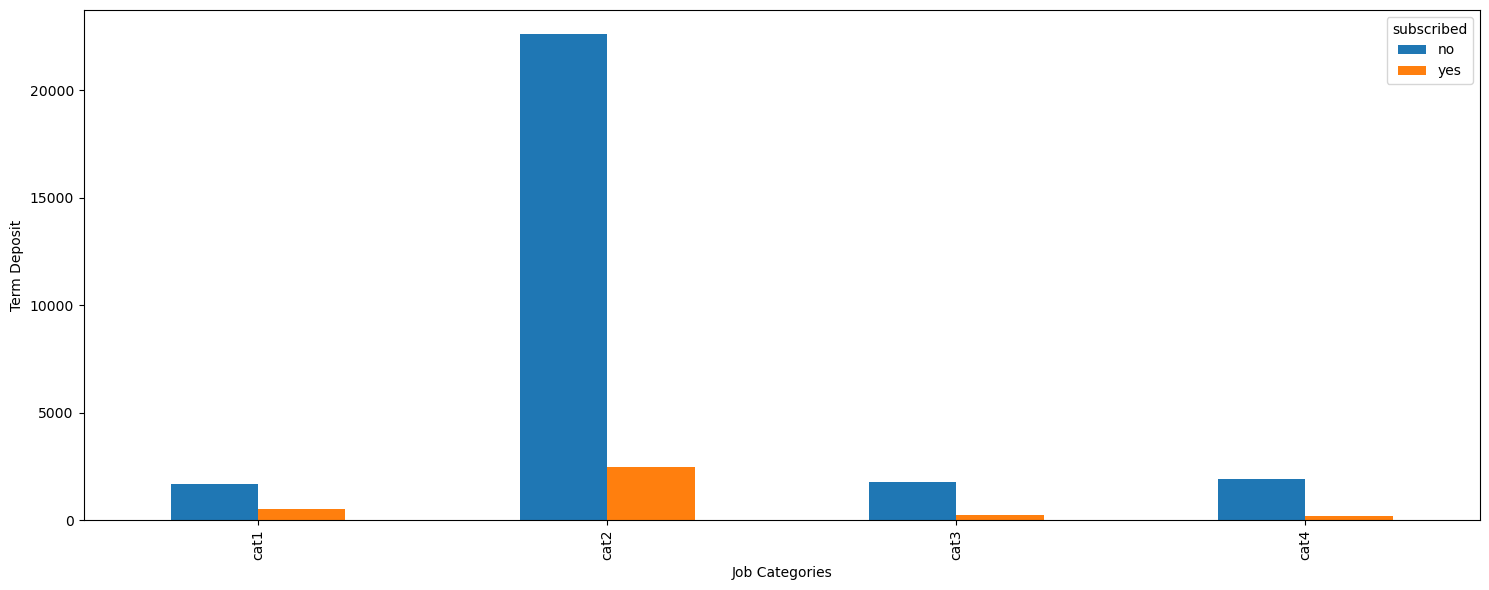

In [28]:
# explore new column with term deposit(y) column

types = df.groupby('job_categories')['subscribed'].value_counts(normalize=False).unstack()
types.plot(kind='bar', xlabel=('Job Categories'), ylabel=('Term Deposit'), figsize=(15,6))
plt.tight_layout()
plt.show()

**observations :-**

- we observed that category 1 and 2 have a high subscription ratio of term deposit. However, we noticed that the bank contacted more customers in category 2 as compared to category 1. This suggests that the bank should focus more on category 2 customers, but at the same time, they should not ignore category 1 customers as well, because even though the number of customers is less, the ratio of subscribed customers is still high. 

- the bank should try to strike a balance between these two categories and allocate their resources accordingly to maximize their subscription rate.

In [29]:
# converting age column into new categorical column by assinging categories

def age_category(age):
  if age < 30:
     return 'struggling'
  elif age < 50:
     return 'stable'
  elif age < 60:
     return 'about to retire'
  elif age < 75:
     return 'old age'
  else: 
     return 'counting a last breathe'

In [30]:
# apply function age_category for add new column in dataset

df['age_categories']=df['age'].apply(age_category)

df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,job_categories,age_categories
25013,45023,42,admin.,married,unknown,no,756,no,no,cellular,14,oct,72,4,160,3,failure,no,cat2,stable


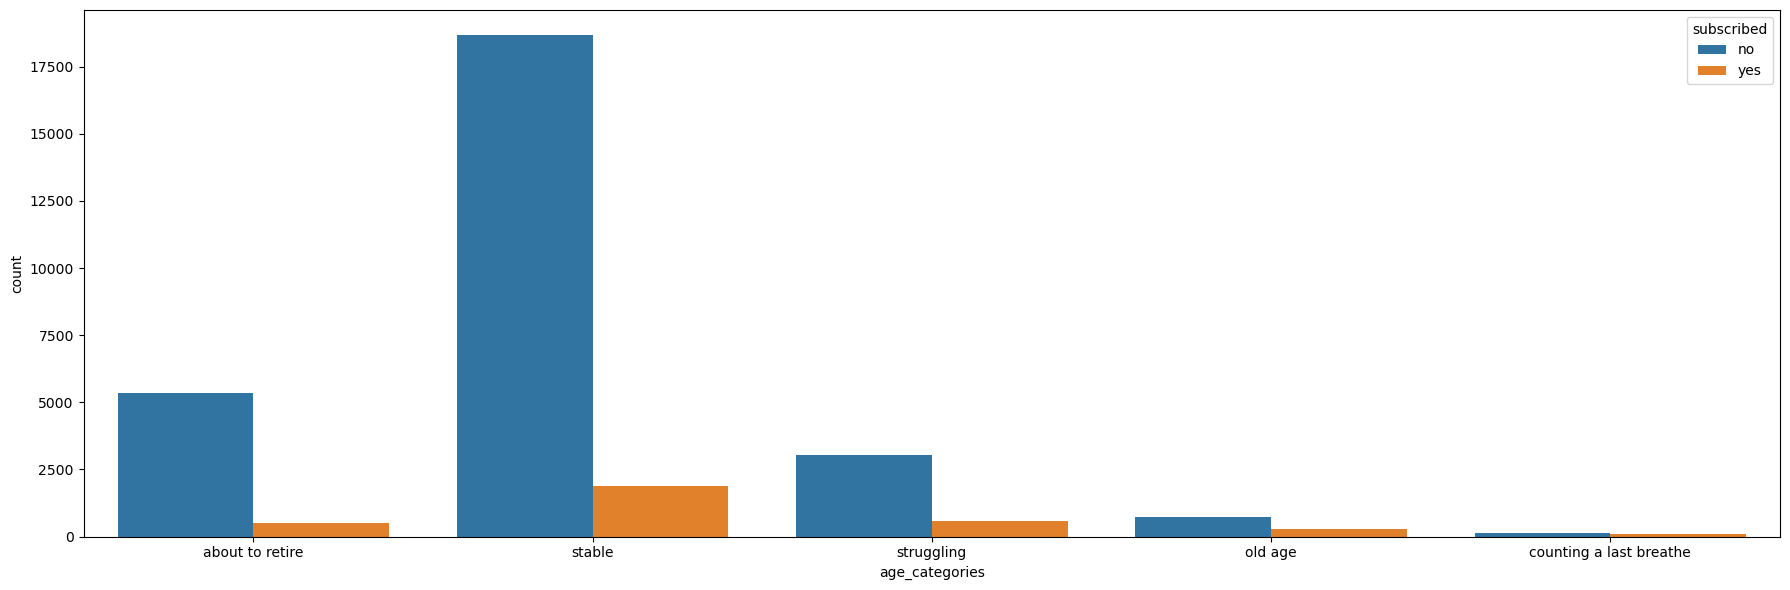

In [31]:
# explore new column age_categories with term deposit(y) column

plt.figure(figsize=(18,6))

sns.countplot(x='age_categories', hue='subscribed', data=df)
plt.xlabel('age_categories', color='black')
plt.tight_layout()
plt.show()

In [32]:
# converting those features into binary class numeric features

df["default"]=df["default"].apply(lambda x : 1 if x=='yes' else 0)
df["loan"]=df["loan"].apply(lambda x : 1 if x=='yes' else 0)
df["housing"]=df["housing"].apply(lambda x : 1 if x=='yes' else 0)
df["subscribed"]=df["subscribed"].apply(lambda x : 1 if x=='yes' else 0)

df.sample()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,job_categories,age_categories
23485,43708,37,technician,single,tertiary,0,197,0,0,cellular,13,may,234,1,87,3,success,1,cat2,stable


In [33]:
# droppping columns because we have extracted new features from that columns.

df.drop(columns=['age','job','pdays','duration'], axis=1, inplace=True)

**Note :-**

- The columns 'pdays' and 'duration' were removed from the dataset as they are not relevant for building a predictive model for new customers. 'duration' represents the duration of the last contact with the customer in the previous campaign, and 'pdays' represents the number of days that have passed since the customer was last contacted. As we are building a model for new customers, this information is not available for them. Hence, removing these columns will prevent any bias or overfitting that may result from using irrelevant or unavailable data.

# Data Preprocessing / Preparing Features for Machine Learning

checking missing values

In [34]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))


Number of null values in each column:
ID                0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
campaign          0
previous          0
poutcome          0
subscribed        0
job_categories    0
age_categories    0
dtype: int64


In [35]:
print("Data types and their frequency\n{}".format(df.dtypes.value_counts()))


Data types and their frequency
int64     9
object    7
dtype: int64


# Preparing for Categorical Variables / Convert Categorical Variables to Numeric Features# 

    Map Ordinal Values To Integers
    Encode Nominal Values as Dummy Variables

In [36]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'subscribed']

In [37]:
# Creating dummy variables for categorical variables

marital = pd.get_dummies(df['marital'],prefix='marital')
contact = pd.get_dummies(df['contact'], prefix='contact')
poutcome = pd.get_dummies(df['poutcome'], prefix = 'poutcome')
month = pd.get_dummies(df['month'], prefix = 'month')
age_cat = pd.get_dummies(df['education'],prefix = 'education')
job = pd.get_dummies(df['job_categories'],prefix = 'job_categories')
education = pd.get_dummies(df['age_categories'],prefix = 'age_categories')

In [38]:
df = pd.concat([df,marital,contact,poutcome,month,education,job,age_cat],axis=1)

In [39]:
# dropping original column

df.drop(columns=['marital','contact','poutcome','month','education','job_categories','age_categories'], axis=1, inplace=True)

In [40]:
# dropping one of the resultant columns

df.drop(columns=['marital_divorced','contact_unknown','poutcome_other','month_dec','education_unknown','job_categories_cat3',
                      'age_categories_counting a last breathe'], axis=1, inplace=True)

In [41]:
df.sample()

,ID,default,balance,housing,loan,day,campaign,previous,subscribed,marital_married,...,age_categories_about to retire,age_categories_old age,age_categories_stable,age_categories_struggling,job_categories_cat1,job_categories_cat2,job_categories_cat4,education_primary,education_secondary,education_tertiary
15745,40328,0,640,0,0,17,2,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [42]:
df1=df.drop(['ID'],axis=1)

In [43]:
df1.shape

(31306, 36)

# Preparing for Numerical Variables

-Input variable duration is highly affect the target variables. Therefore, I will remove it.


In [44]:
df1['subscribed'].value_counts()


0    27932
1     3374
Name: subscribed, dtype: int64

# `Splitting Dependent and Independent Variables`

In [45]:
#seprating our dependent and independent features

x=df1.drop(columns=['subscribed'],axis=1)
y=(df1['subscribed'])

In [46]:
x.head()

,default,balance,housing,loan,day,campaign,previous,marital_married,marital_single,contact_cellular,...,age_categories_about to retire,age_categories_old age,age_categories_stable,age_categories_struggling,job_categories_cat1,job_categories_cat2,job_categories_cat4,education_primary,education_secondary,education_tertiary
0,0,1933,0,0,19,2,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,3,0,0,20,2,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,891,1,0,18,1,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0,3287,0,0,22,1,3,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,119,1,0,4,1,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0


In [47]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

# SMOTHE oversampling for handling imbalanced class

In [48]:
from imblearn.over_sampling import SMOTE


In [49]:
sampler=SMOTE()
X ,y = sampler.fit_resample(x,y)

In [50]:
# Original length and Resampled Length

print('Original Dataset length',len(x))
print('Resampled Dataset length',len(X))

Original Dataset length 31306
Resampled Dataset length 55864


# splitting dataset

In [54]:
# calling train_test_split() to get the training and testing data.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=56)

# split sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39104, 35)
(16760, 35)
(39104,)
(16760,)


# Standard Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)


# Machine Learning

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, accuracy_score,classification_report,roc_curve,f1_score    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

# Finding best Random state¶


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9337708830548926 on Random_state 56


In [58]:
from sklearn.svm import SVC

model=[ LogisticRegression(),KNeighborsClassifier(),
        DecisionTreeClassifier(),
        RandomForestClassifier(),
        GradientBoostingClassifier(),
        ]
for m in model:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+' Classification ML Algorithm Evaluation Matrix',m,'is'+'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score  :'+'\033[0m', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix  :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m'+'classification Report'+'\033[0m \n',classification_report(y_test, y_pred))


C:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score  : 0.8160501193317422


Confusion matrix  : 
 [[7321 1076]
 [2007 6356]]


classification Report 
               precision    recall  f1-score   support

           0       0.78      0.87      0.83      8397
           1       0.86      0.76      0.80      8363

    accuracy                           0.82     16760
   macro avg       0.82      0.82      0.82     16760
weighted avg       0.82      0.82      0.82     16760



C:\New folder\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


 Classification ML Algorithm Evaluation Matrix KNeighborsClassifier() is


Accuracy Score  : 0.8109785202863962


Confusion matrix  : 
 [[5691 2706]
 [ 462 7901]]


classification Report 
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      8397
           1       0.74      0.94      0.83      8363

    accuracy                           0.81     16760
   macro avg       0.83      0.81      0.81     16760
weighted avg       0.84      0.81      0.81     16760

 Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score  : 0.9041766109785203


Confusion matrix  : 
 [[7472  925]
 [ 681 7682]]


classification Report 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      8397
           1       0.89      0.92      0.91      8363

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.

from the above we can see that RandomForestClassifier() is giving the maximum accuracy

#  Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score
model=[ LogisticRegression(),
        DecisionTreeClassifier(),
        RandomForestClassifier()
        ]

for m in model:
    score = cross_val_score(m, X,y, cv =5)
    print('\n')
    print('Cross Validation Score', m, ':')
    print("Score :" ,score)
    print('Mean Score',score.mean())
    print('Std Deviation',score.std())
    print('\n')
    print('---------------------------------')    



C:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_re



Cross Validation Score LogisticRegression() :
Score : [0.71645932 0.87460843 0.83791283 0.88731764 0.84541711]
Mean Score 0.8323430666269438
Std Deviation 0.06072818147978216


---------------------------------


Cross Validation Score DecisionTreeClassifier() :
Score : [0.72469346 0.93743847 0.93887049 0.93708046 0.93501611]
Mean Score 0.8946197980150667
Std Deviation 0.08497210564679238


---------------------------------


Cross Validation Score RandomForestClassifier() :
Score : [0.73292759 0.97162803 0.97386557 0.97404457 0.97180451]
Mean Score 0.924854055392666
Std Deviation 0.0959684868848195


---------------------------------


# hyperparameter tuning

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# giving parameters
parameters = {
    'n_estimators':[200,500],
    'max_depth' :[4,6,8]
}
 


In [ ]:
# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfc=GridSearchCV(RandomForestClassifier(), param_grid=parameters , cv=5)
rfc.fit(X_train,y_train)
print('\n')
print('\033[1mCross-validation Test score and best params\033[0m')
print("The best parameters is", rfc.best_params_)
print('cross-validation score', rfc.best_score_)


# Final model

In [65]:
Final_mod = RandomForestClassifier( max_depth= 6, n_estimators= 200,random_state= 56)
Final_mod.fit(X_train,y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Final RandomForest Classifier  Model'+'\033[0m')
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix  :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'Classification Report '+'\033[0m \n',classification_report(y_test, y_pred))

Final RandomForest Classifier  Model
Accuracy Score :
 0.8970167064439141


Confusion matrix  : 
 [[7691  706]
 [1020 7343]]


Classification Report  
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      8397
           1       0.91      0.88      0.89      8363

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760



# saving the model

In [66]:
import joblib
joblib.dump(Final_mod,'Bank_Marketing_Project.pkl')


['Bank_Marketing_Project.pkl']

# prediction of final model

In [67]:
prediction = Final_mod.predict(X_test)


In [69]:
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,1,0
3,0,1
4,1,0
